# Panagiotis Karamitopoulos

# Assignment 10 - Clustering

#Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

#Question 1

#1.1 Load Dataset

In [2]:
df = pd.read_csv("dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#1.2 Drop Features

In [3]:
drop_cols = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']
df_drop_cols = df[drop_cols].copy()
df_features = df.drop(columns=drop_cols)
df_features.shape, df_drop_cols.shape

((114000, 16), (114000, 5))

#1.3 Genres One-Hot Encoding

In [4]:
df_features_encoded = pd.get_dummies(df_features,columns=["track_genre"])

#Question 2

#Standard Scaling Normalization

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features_encoded)
df_scaled = pd.DataFrame(scaled_data, columns=df_features_encoded.columns, index=df_features_encoded.index)


#Question 3

#3.1 K-Means

In [6]:
kappas = [2, 3, 5, 7, 10, 15, 20]
sse = []
for k in kappas:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_scaled)
  sse.append(kmeans.inertia_)



#3.2 Plot SSE

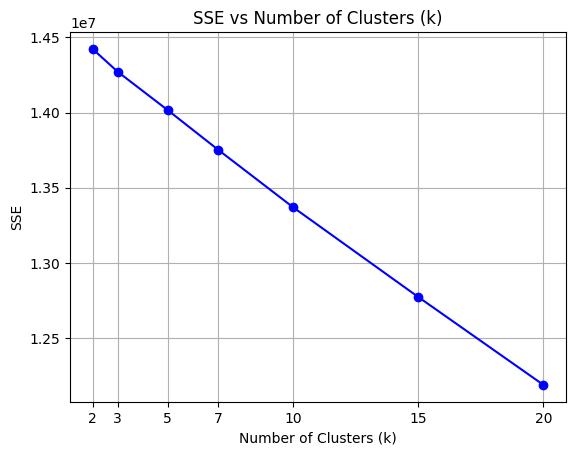

In [7]:
plt.figure()
plt.plot(kappas, sse, marker='o', color='b')
plt.title('SSE vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(kappas)
plt.grid(True)
plt.show()

#Question 4

#Elbow Method

In [8]:
k_optimal = 10
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)
df_scaled["cluster"] = cluster_labels
df_scaled["cluster"].value_counts().sort_index()


,count
cluster,
0,6445
1,16575
2,16847
3,8034
4,12940
5,19243
6,10974
7,14062
8,1000


#Question 5

#5.1 Dominant Genres

In [9]:
df["cluster"] = df_scaled["cluster"]
cluster_genre_counts = (df.groupby(["cluster", "track_genre"]).size().reset_index(name="count"))
cluster_sizes = (df.groupby("cluster").size().reset_index(name="total"))
cluster_genre_counts = cluster_genre_counts.merge(cluster_sizes, on="cluster")
cluster_genre_counts["percentage"] = (cluster_genre_counts["count"] / cluster_genre_counts["total"]) * 100
dominant_genres = (cluster_genre_counts.sort_values(["cluster", "percentage"], ascending=[True, False]).groupby("cluster").first().reset_index())
dominant_genres

,cluster,track_genre,count,total,percentage
0,0,death-metal,1000,6445,15.515904
1,1,alt-rock,1000,16575,6.033183
2,2,cantopop,1000,16847,5.935775
3,3,sleep,999,8034,12.434653
4,4,deep-house,1000,12940,7.727975
5,5,dub,1000,19243,5.196695
6,6,country,1000,10974,9.112448
7,7,alternative,1000,14062,7.111364
8,8,comedy,1000,1000,100.000000
9,9,breakbeat,1000,7880,12.690355


#5.2 Dominant Genres

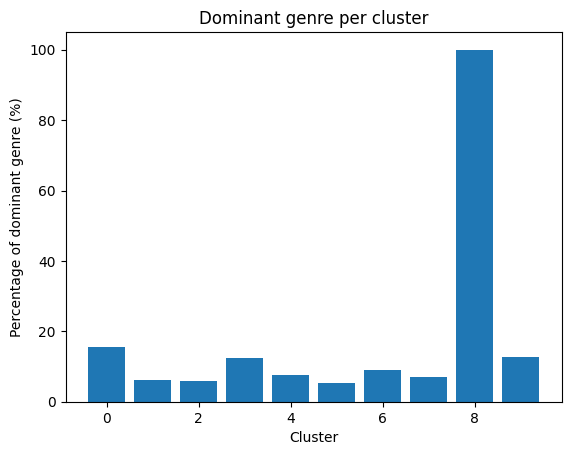

In [10]:
plt.figure()
plt.bar(dominant_genres["cluster"], dominant_genres["percentage"])
plt.xlabel("Cluster")
plt.ylabel("Percentage of dominant genre (%)")
plt.title("Dominant genre per cluster")
plt.show()

#Question 6

#6.1 Select Song

In [11]:
song_row = df[(df["track_name"].str.lower() == "on the floor") & (df["artists"].str.contains("Jennifer Lopez"))].iloc[0]
song_index = song_row.name
song_title = song_row["track_name"]
song_artist = song_row["artists"]

#6.2 Find Cluster

In [12]:
song_cluster = df_scaled.loc[song_index, "cluster"]
print("Song:", song_title)
print("Artist:", song_artist)
print("Cluster:", song_cluster)

Song: On The Floor
Artist: Jennifer Lopez;Pitbull
Cluster: 7


Το επιλεγμένο τραγούδι "On The Floor" των Jennifer Lopez και Pitbull υπάρχει στο cluster 7.

#6.3 Top 3 Similar Songs

In [13]:
cluster_data = df_scaled[df_scaled["cluster"] == song_cluster].drop(columns=["cluster"])
song_vector = cluster_data.loc[[song_index]]
distances = euclidean_distances(song_vector, cluster_data)[0]
distance_series = pd.Series(distances, index=cluster_data.index)
top_3_indices = distance_series.sort_values().iloc[1:4].index
top_3_songs = df_drop_cols.loc[top_3_indices, ["track_name", "artists"]]
top_3_songs

,track_name,artists
20755,Symphony (feat. Zara Larsson),Clean Bandit;Zara Larsson
20751,Stay,Zedd;Alessia Cara
20955,The One That Got Away,Katy Perry


Τα προτεινόμενα τραγούδια αν και παρουσιάζουν κάποιες ομοιότητες ως προς ορισμένα χαρακτηριστικά, δεν είναι παρόμοια με το αρχικό. Πιο συγκεκριμένα, κάποια τραγούδια έχουν πιο pop ή συναισθηματικό χαρακτήρα, κάτι το οποίο υποδηλώνει τους περιορισμούς της ευκλείδειας απόστασης στην αποτύπωση του μουσικού ύφους.

#Question 7

#Top 3 Similar Songs - Cosine Similarity

In [14]:
cluster_data = df_scaled[df_scaled["cluster"] == song_cluster].drop(columns=["cluster"])
song_vector = cluster_data.loc[[song_index]]
cosine_dist = cosine_distances(song_vector, cluster_data)[0]
cosine_series = pd.Series(cosine_dist, index=cluster_data.index)
top_3_cosine_idx = cosine_series.sort_values().iloc[1:4].index
top_3_cosine = df_drop_cols.loc[top_3_indices, ["track_name", "artists"]]
top_3_cosine

,track_name,artists
20755,Symphony (feat. Zara Larsson),Clean Bandit;Zara Larsson
20751,Stay,Zedd;Alessia Cara
20955,The One That Got Away,Katy Perry


Η χρήση του cosine similarity οδήγησε στο ίδιο σύνολο προτεινόμενων τραγουδιών με την ευκλείδεια απόσταση, ωστόσο η σειρά κατάταξης τροποποιήθηκε.

#Question 9

#DBSCAN

In [15]:
dbscan = DBSCAN(eps=2.5, min_samples=10, metric="euclidean")
db_labels = dbscan.fit_predict(df_scaled.drop(columns=["cluster"]))
unique_labels = set(db_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(db_labels).count(-1)
print("Νumber of clusters:", n_clusters)
print("Noise points:", n_noise)

Νumber of clusters: 252
Noise points: 11843


 Ο DBSCAN οδήγησε σε διαφορετικό αριθμό clusters σε σύγκριση με τον K-Means, ενώ παράλληλα εντοπίστηκαν και σημεία θορύβου. Σε αντίθεση με τον K-Means, ο DBSCAN δεν απαιτεί εκ των προτέρων ορισμό του αριθμού των clusters, ωστόσο η επιλογή των παραμέτρων επηρεάζει σημαντικά το αποτέλεσμα.